In [1]:
import xarray as xr

In [2]:
import pandas as pd
from datetime import timedelta

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [11]:
ds_error = xr.open_dataset('./../data/final_preds/godavari-gconv-10-errors.nc', engine='netcdf4').compute()

In [12]:
ds_preds = xr.open_dataset('./../data/final_preds/godavari-gconv-10-preds.nc', engine='netcdf4').compute()

In [13]:
ds_preds

<xarray.Dataset>
Dimensions:     (date: 554, step: 90, site: 13)
Coordinates:
  * date        (date) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * step        (step) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * site        (site) object 'sriramsagar' ... 'bhandardara'
Data variables:
    obs         (date, step, site) float64 0.0 -0.002764 ... -0.004158 -0.006579
    sim-frozen  (date, step, site) float64 -0.00111 -0.001227 ... -0.003682
    sim-mean    (date, step, site) float64 -0.001833 -0.0009984 ... -0.002504
    sim-std     (date, step, site) float64 0.0009671 0.0008543 ... 0.0101
    ci-95+      (date, step, site) float64 0.0001015 0.0007103 ... -0.001888
    ci-95-      (date, step, site) float64 -0.003767 -0.002707 ... -0.003119
    valid_time  (date, step) datetime64[ns] 2011-01-02 2011-01-03 ... 2021-03-31

In [5]:
ds = xr.open_dataset('./../data/soft_data_ruled.nc', engine='netcdf4').compute()

In [20]:
ds["shift_targets_WATER_VOLUME"].isel({'steps':0}).max(dim='date')

<xarray.DataArray 'shift_targets_WATER_VOLUME' (global_sites: 6)>
array([0.31596639, 0.61818182, 0.15318231, 0.38063063, 0.27343078,
       0.50651042])
Coordinates:
    steps         timedelta64[ns] 00:00:00
  * global_sites  (global_sites) object 'bhadra' 'harangi' ... 'lower_bhawani'

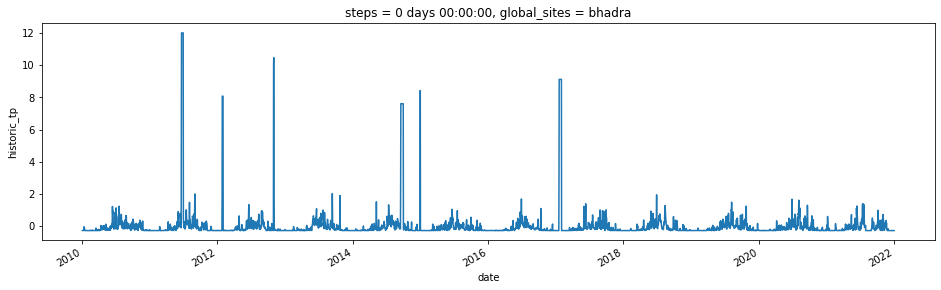

In [242]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
ds.isel({'global_sites':0})['historic_tp'].isel({'steps':0}).plot(ax=ax)

In [192]:
historic_variables =["historic_t2m","historic_tp","targets_WATER_VOLUME","doy_cos","doy_sin"]
historic_seq_len=60

In [193]:
def _get_historic_data(
    data: xr.Dataset,
) -> xr.Dataset:

    data_h = xr.concat(
        [
            data[historic_variables]
            .sel({"steps": np.timedelta64(0)})
            .shift({"date": ii})
            for ii in range(historic_seq_len)
        ],
        pd.TimedeltaIndex(
            [
                timedelta(days=-historic_seq_len + ii)
                for ii in range(historic_seq_len)
            ],
            name="historic_roll",
        ),
    )

    return data_h.to_array().transpose(
        "date", "global_sites", "variable", "historic_roll"
    )

In [196]:
historic_data = _get_historic_data(ds)

In [198]:
historic_data

<xarray.DataArray (date: 4383, global_sites: 6, variable: 5, historic_roll: 60)>
array([[[[ 4.67621311e-02,             nan,             nan, ...,
                      nan,             nan,             nan],
         [-2.71222817e-01,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 1.00000000e+00,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 9.99407401e-01,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 3.44216116e-02,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[ 4.70334073e-02,             nan,             nan, ...,
                      nan,             nan,             nan],
         [-4.84455848e-01,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 1.40909091e-01,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 9.99407401e-01,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 3.44216116e-02,             nan,             nan, ...,
...
           2.37814801e-02,  3.92261188e-02,  4.41197341e-03],
         [-3.83333777e-01, -3.83333777e-01, -3.83333777e-01, ...,
           1.26110759e-01,  3.03747098e-01,  1.62770620e+00],
         [ 9.44969905e-01,  9.45829751e-01,  9.50128977e-01, ...,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
         [ 9.99851839e-01,  1.00000000e+00,  9.99851839e-01, ...,
           5.70242293e-01,  5.56017437e-01,  5.41627821e-01],
         [ 1.72133562e-02, -2.44929360e-16, -1.72133562e-02, ...,
          -8.21476553e-01, -8.31170626e-01, -8.40618406e-01]],

        [[-1.13077649e+01, -1.13077649e+01, -1.13077649e+01, ...,
           8.89134932e-02,  7.85580289e-02,  3.80556358e-02],
         [-2.89369277e-01, -2.89369277e-01, -2.89369277e-01, ...,
          -1.17570862e-01, -1.30762126e-01,  1.11971265e-01],
         [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
         [ 9.99851839e-01,  1.00000000e+00,  9.99851839e-01, ...,
           5.70242293e-01,  5.56017437e-01,  5.41627821e-01],
         [ 1.72133562e-02, -2.44929360e-16, -1.72133562e-02, ...,
          -8.21476553e-01, -8.31170626e-01, -8.40618406e-01]]]])
Coordinates:
    steps          timedelta64[ns] 00:00:00
  * date           (date) datetime64[ns] 2010-01-02 2010-01-03 ... 2022-01-01
  * global_sites   (global_sites) object 'bhadra' 'harangi' ... 'lower_bhawani'
  * historic_roll  (historic_roll) timedelta64[ns] -60 days -59 days ... -1 days
  * variable       (variable) <U20 'historic_t2m' 'historic_tp' ... 'doy_sin'

In [200]:
historic_data = historic_data.drop("steps") \
.stack({"sites-variable": ("global_sites", "variable")}) \
.transpose("date", "historic_roll", "sites-variable")

In [205]:
historic_data['sites-variable'].data

array([('bhadra', 'historic_t2m'), ('bhadra', 'historic_tp'),
       ('bhadra', 'targets_WATER_VOLUME'), ('bhadra', 'doy_cos'),
       ('bhadra', 'doy_sin'), ('harangi', 'historic_t2m'),
       ('harangi', 'historic_tp'), ('harangi', 'targets_WATER_VOLUME'),
       ('harangi', 'doy_cos'), ('harangi', 'doy_sin'),
       ('hemavathy', 'historic_t2m'), ('hemavathy', 'historic_tp'),
       ('hemavathy', 'targets_WATER_VOLUME'), ('hemavathy', 'doy_cos'),
       ('hemavathy', 'doy_sin'), ('kabini', 'historic_t2m'),
       ('kabini', 'historic_tp'), ('kabini', 'targets_WATER_VOLUME'),
       ('kabini', 'doy_cos'), ('kabini', 'doy_sin'),
       ('krishnaraja_sagar', 'historic_t2m'),
       ('krishnaraja_sagar', 'historic_tp'),
       ('krishnaraja_sagar', 'targets_WATER_VOLUME'),
       ('krishnaraja_sagar', 'doy_cos'), ('krishnaraja_sagar', 'doy_sin'),
       ('lower_bhawani', 'historic_t2m'),
       ('lower_bhawani', 'historic_tp'),
       ('lower_bhawani', 'targets_WATER_VOLUME'),
       ('

In [222]:
drop_idxs = []
for var in ['doy_cos','doy_sin']:
    drop_idxs.append(np.where(historic_data['variable'].data==var)[0][1:])

In [223]:
drop_idxs

[array([ 8, 13, 18, 23, 28]), array([ 9, 14, 19, 24, 29])]

In [228]:
historic_data.shape

(4383, 60, 30)

In [232]:
keep_idx = ~np.isin(np.arange(historic_data.shape[-1]),np.union1d(*drop_idxs))

In [234]:
historic_data.isel({'sites-variable':keep_idx})

<xarray.DataArray (date: 4383, historic_roll: 60, sites-variable: 20)>
array([[[ 4.67621311e-02, -2.71222817e-01,  1.00000000e+00, ...,
          6.47951069e-02, -2.80470998e-01,  7.53906250e-01],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 5.34468917e-03, -2.75073967e-01,  1.00000000e+00, ...,
          5.50150783e-02, -2.88917169e-01,  7.51302083e-01],
        [ 4.67621311e-02, -2.71222817e-01,  1.00000000e+00, ...,
          6.47951069e-02, -2.80470998e-01,  7.53906250e-01],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
        [ 5.04912128e-02,  4.20555200e-01,  9.93277311e-01, ...,
          7.85580289e-02, -1.30762126e-01,  1.00000000e+00],
        [ 8.18599973e-03,  7.25146796e-01,  9.93277311e-01, ...,
          3.80556358e-02,  1.11971265e-01,  1.00000000e+00],
        [ 7.82047328e-02, -6.87275059e-02,  9.96638655e-01, ...,
          8.80210196e-02, -1.51620584e-02,  1.00000000e+00]],

       [[-1.15897815e+01, -2.75280631e-01,  9.96638655e-01, ...,
         -1.13077649e+01, -2.89369277e-01,  1.00000000e+00],
        [-1.15897815e+01, -2.75280631e-01,  9.98319328e-01, ...,
         -1.13077649e+01, -2.89369277e-01,  1.00000000e+00],
        [-1.15897815e+01, -2.75280631e-01,  9.99159664e-01, ...,
         -1.13077649e+01, -2.89369277e-01,  1.00000000e+00],
        ...,
        [ 2.56723404e-02,  3.87271772e-01,  9.89915966e-01, ...,
          8.89134932e-02, -1.17570862e-01,  1.00000000e+00],
        [ 5.04912128e-02,  4.20555200e-01,  9.93277311e-01, ...,
          7.85580289e-02, -1.30762126e-01,  1.00000000e+00],
        [ 8.18599973e-03,  7.25146796e-01,  9.93277311e-01, ...,
          3.80556358e-02,  1.11971265e-01,  1.00000000e+00]]])
Coordinates:
  * date            (date) datetime64[ns] 2010-01-02 2010-01-03 ... 2022-01-01
  * historic_roll   (historic_roll) timedelta64[ns] -60 days ... -1 days
  * sites-variable  (sites-variable) MultiIndex
  - global_sites    (sites-variable) object 'bhadra' ... 'lower_bhawani'
  - variable        (sites-variable) object 'historic_t2m' ... 'targets_WATER...

In [213]:
drop_idx = np.where(historic_data['variable'].data=='doy_cos')[0][1:]

In [173]:
cmap = cm.get_cmap("winter_r")
n_cols = 3
n_rows = ceil(len(preds["site"]) / n_cols) * len(test_chunks)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axs = axs.flatten()
_ii = 0
for chunk in test_chunks:
    date_idx = (preds["date"] >= pd.to_datetime(chunk[0])) & (
        preds["date"] <= pd.to_datetime(chunk[1])
    )
    for site in preds["site"].data:

        for step in [5, 15, 25, 50, 75, 89]:
            # print (site, step)
            hexcolor = "#" + "".join(
                f"{int(el*255):02x}" for el in cmap(int(step / 90 * 255))[:3]
            )
            # plot main
            preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                date=step
            )[main_dim].plot(ax=axs[_ii], c=hexcolor)

            # plot CI if available
            if ci_dims is not None:
                for dim in ci_dims:
                    preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                        date=step
                    )[dim].plot(ax=axs[_ii], c=hexcolor, ls=':')

        preds.sel({"site": site, "step": 0, "date": date_idx})["obs"].plot(
            ax=axs[_ii], c="#f200ff"
        )
        _ii += 1

NameError: name 'cm' is not defined

In [6]:
ds['sim-frozen']

<xarray.DataArray 'sim-frozen' (date: 730, step: 90, site: 6)>
array([[[ 0.10389932,  0.13304529,  0.02191053,  0.07966825,
          0.16427933,  0.05429979],
        [ 0.05222091,  0.12281626,  0.05327103,  0.09341037,
          0.12723006,  0.08592481],
        [ 0.02974995,  0.11824352,  0.07935316,  0.09854224,
          0.10598323,  0.09786649],
        ...,
        [-0.01176944,  0.14271459,  0.1053555 ,  0.13506487,
         -0.01753125,  0.12479906],
        [-0.01274941,  0.14301117,  0.10561104,  0.13370565,
         -0.01779225,  0.12398246],
        [-0.01369445,  0.14331158,  0.10585207,  0.13232931,
         -0.01801118,  0.12316588]],

       [[ 0.10310125,  0.1335785 ,  0.0202115 ,  0.08103704,
          0.16342846,  0.05417003],
        [ 0.05117864,  0.12296442,  0.05250213,  0.09412666,
          0.12638135,  0.08589877],
        [ 0.02845713,  0.11850376,  0.07866518,  0.09898695,
          0.10588065,  0.09695534],
...
        [-0.00970216,  0.1421321 ,  0.10480081,  0.13772683,
         -0.01687956,  0.12642854],
        [-0.01075391,  0.14242162,  0.10508543,  0.1364057 ,
         -0.0172273 ,  0.12561472],
        [-0.01176944,  0.14271459,  0.1053555 ,  0.13506487,
         -0.01753125,  0.12479906]],

       [[ 0.13957012,  0.1517016 ,  0.01684706,  0.06800441,
          0.16725698,  0.07312667],
        [ 0.07607939,  0.12807897,  0.05048893,  0.08801537,
          0.12501273,  0.09772582],
        [ 0.0447564 ,  0.11682335,  0.07747398,  0.09560184,
          0.10117134,  0.1055722 ],
        ...,
        [-0.01075391,  0.14242162,  0.10508543,  0.1364057 ,
         -0.0172273 ,  0.12561472],
        [-0.01176944,  0.14271459,  0.1053555 ,  0.13506487,
         -0.01753125,  0.12479906],
        [-0.01274941,  0.14301117,  0.10561104,  0.13370565,
         -0.01779225,  0.12398246]]], dtype=float32)
Coordinates:
  * date     (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2018-12-31
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * site     (site) object 'bhadra' 'harangi' ... 'lower_bhawani'

In [11]:
ds['ci-95+'].isel({'site':0,'date':5})

<xarray.DataArray 'ci-95+' (step: 90)>
array([ 0.10001513,  0.05146981,  0.0302455 ,  0.02166143,  0.01777196,
        0.01652023,  0.01525155,  0.01450566,  0.01472601,  0.01482629,
        0.01517952,  0.01527002,  0.01479861,  0.01436509,  0.06067561,
        0.07715532,  0.08750596,  0.09443775,  0.09939837,  0.10250458,
        0.10417189,  0.1046401 ,  0.10416716,  0.10325609,  0.10159694,
        0.09973407,  0.09799768,  0.0959769 ,  0.09383328,  0.0912777 ,
        0.08913119,  0.0870266 ,  0.0844278 ,  0.08202328,  0.07964393,
        0.077189  ,  0.07479111,  0.07254115,  0.07005284,  0.06764292,
        0.06507365,  0.06263608,  0.06017096,  0.05787691,  0.0557848 ,
        0.053498  ,  0.05103247,  0.04854713,  0.04620734,  0.04411862,
        0.04219688,  0.04001941,  0.03790314,  0.03530632,  0.03355134,
        0.0314262 ,  0.02929237,  0.02711226,  0.02550878,  0.02352264,
        0.02166994,  0.01977715,  0.01819829,  0.01612421,  0.01460881,
        0.01290105,  0.01119942,  0.00988175,  0.00835042,  0.00640563,
        0.00497707,  0.00351169,  0.00231634,  0.0005873 , -0.00050437,
       -0.0017203 , -0.0032577 , -0.00435153, -0.00535849, -0.00671529,
       -0.00791662, -0.00876646, -0.0097557 , -0.01065326, -0.01161109,
       -0.01286184, -0.01359671, -0.01427342, -0.01519398, -0.0160109 ],
      dtype=float32)
Coordinates:
    date     datetime64[ns] 2013-01-06
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    site     <U6 'bhadra'

In [19]:
ds

<xarray.Dataset>
Dimensions:     (date: 730, step: 90, site: 6)
Coordinates:
  * date        (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2018-12-31
  * step        (step) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * site        (site) object 'bhadra' 'harangi' ... 'lower_bhawani'
Data variables:
    obs         (date, step, site) float32 0.0 0.0 0.0 ... -0.008598 -0.002604
    sim-frozen  (date, step, site) float32 0.1039 0.133 ... -0.01779 0.124
    sim-mean    (date, step, site) float32 0.1041 0.1326 ... -0.01785 0.124
    sim-std     (date, step, site) float32 0.001587 0.001388 ... 0.0008423
    ci-95+      (date, step, site) float32 0.1072 0.1354 ... -0.01643 0.1257
    ci-95-      (date, step, site) float32 0.1009 0.1299 ... -0.01928 0.1223
    valid_time  (date, step) datetime64[ns] 2013-01-02 2013-01-03 ... 2019-03-31

In [22]:
ds2['ci-95-'].isel({'site':0,'date':5})

<xarray.DataArray 'ci-95-' (step: 90)>
array([ 3.9027046e-02,  5.8173062e-03, -8.3812419e-03, -1.3925161e-02,
       -1.6666815e-02, -1.7247187e-02, -1.7762911e-02, -1.8357135e-02,
       -1.8397564e-02, -1.7867925e-02, -1.7572613e-02, -1.7636675e-02,
       -1.8375421e-02, -1.8819470e-02,  1.1424825e-02,  2.3377396e-02,
        3.1412695e-02,  3.7071597e-02,  4.1012071e-02,  4.3598946e-02,
        4.4866879e-02,  4.5395367e-02,  4.5172844e-02,  4.4508994e-02,
        4.3286428e-02,  4.1961085e-02,  4.0555798e-02,  3.9192192e-02,
        3.7676651e-02,  3.5924457e-02,  3.4202904e-02,  3.2794964e-02,
        3.0852724e-02,  2.9294316e-02,  2.7833054e-02,  2.5850968e-02,
        2.3876071e-02,  2.2227515e-02,  2.0484388e-02,  1.8576365e-02,
        1.6934808e-02,  1.5347427e-02,  1.3537814e-02,  1.2076978e-02,
        1.0006653e-02,  8.1159109e-03,  6.6345753e-03,  5.0819507e-03,
        3.2251836e-03,  1.6940908e-03,  3.9887964e-05, -1.6791581e-03,
       -3.2141709e-03, -4.7819442e-03, -6.2142666e-03, -7.6781185e-03,
       -9.3654115e-03, -1.0697193e-02, -1.2253084e-02, -1.3910413e-02,
       -1.5159153e-02, -1.6436670e-02, -1.7791368e-02, -1.8974140e-02,
       -2.0610008e-02, -2.1603063e-02, -2.2717427e-02, -2.4065390e-02,
       -2.4979783e-02, -2.6142782e-02, -2.7112573e-02, -2.8243044e-02,
       -2.9459268e-02, -3.0515771e-02, -3.1446103e-02, -3.2515287e-02,
       -3.3370007e-02, -3.4279194e-02, -3.5036027e-02, -3.5895295e-02,
       -3.6748149e-02, -3.7408210e-02, -3.8315102e-02, -3.9210740e-02,
       -3.9729096e-02, -4.0558033e-02, -4.0941253e-02, -4.1506138e-02,
       -4.2128775e-02, -4.2733058e-02], dtype=float32)
Coordinates:
    date     datetime64[ns] 2013-01-06
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    site     <U6 'bhadra'

In [32]:
scalar_dict = (
    ds['sim-std'].mean(dim=('site','date'))
    .sel({"step": range(1, 90, 10)})
    .to_dict()
)

In [ ]:
 {kk: vv["data"] for kk, vv in scalar_dict["data"].items()}

In [34]:
scalar_dict['data']

[0.0010370999807491899,
 0.00107867200858891,
 0.0008116941899061203,
 0.0008044179994612932,
 0.0008109350455924869,
 0.0008147472399286926,
 0.000810556230135262,
 0.0008149291388690472,
 0.0008093381184153259]

In [35]:
import torch

/home/lucas/miniconda3/envs/h2ox-ai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
a = torch.rand(10,2)

In [63]:
from torch.nn.functional import pad

In [91]:
a

tensor([[0.7179, 0.6863],
        [0.0369, 0.2877],
        [0.1719, 0.0494],
        [0.9096, 0.6079],
        [0.7365, 0.2572],
        [0.1895, 0.2932],
        [0.3400, 0.2350],
        [0.1206, 0.2736],
        [0.4452, 0.9920],
        [0.6606, 0.5019]])

In [105]:
b.shape[1]

2

In [115]:
import numpy as np

In [159]:
def reverse_cumsum(arr, dim):
    shp = list(arr.shape)
    shp[dim]=1
    return torch.diff(arr, dim=dim, prepend=torch.zeros(*list(shp)))

In [162]:
np.almostequals

AttributeError: module 'numpy' has no attribute 'almostequals'

In [172]:
for _ in range(5):
    a = torch.rand(4,4,5,7)
    for dim in range(len(a.shape)):
        print(np.isclose(a.numpy(),reverse_cumsum(a.cumsum(dim=dim), dim=dim).numpy(), rtol=1e-5, atol=1e-6).all())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [168]:
a

tensor([[[[0.4375, 0.6366, 0.2236, 0.9755, 0.9230, 0.8588, 0.1936],
          [0.3601, 0.4367, 0.6230, 0.9148, 0.9773, 0.3583, 0.3941],
          [0.7899, 0.3782, 0.1987, 0.8738, 0.8145, 0.4441, 0.2856],
          [0.1435, 0.2305, 0.0098, 0.7927, 0.9828, 0.6817, 0.5678],
          [0.4013, 0.4964, 0.3696, 0.8977, 0.2014, 0.0573, 0.7693]],

         [[0.1189, 0.1518, 0.2707, 0.0259, 0.9909, 0.8347, 0.9473],
          [0.5465, 0.6766, 0.7517, 0.7374, 0.0971, 0.9607, 0.4513],
          [0.7920, 0.3929, 0.0096, 0.4660, 0.8678, 0.3224, 0.5431],
          [0.7444, 0.9718, 0.7786, 0.0174, 0.9118, 0.7240, 0.0320],
          [0.4456, 0.4328, 0.3221, 0.8275, 0.5680, 0.0529, 0.9842]],

         [[0.2055, 0.9245, 0.2688, 0.8770, 0.6106, 0.8331, 0.0163],
          [0.0552, 0.1012, 0.4391, 0.5513, 0.6610, 0.0639, 0.1767],
          [0.6455, 0.5368, 0.2625, 0.0140, 0.4874, 0.4512, 0.9547],
          [0.1321, 0.4929, 0.3272, 0.6594, 0.2270, 0.7419, 0.8122],
          [0.8636, 0.1169, 0.4032, 0.5865, 0

In [167]:
a-reverse_cumsum(a.cumsum(dim=dim), dim=dim)

tensor([[[[ 0.0000e+00,  0.0000e+00,  5.9605e-08,  0.0000e+00,  0.0000e+00,
           -2.3842e-07,  1.1921e-07],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -5.9605e-08,  5.9605e-08,
            0.0000e+00,  1.1921e-07],
          [ 0.0000e+00, -5.9605e-08,  0.0000e+00,  1.1921e-07, -5.9605e-08,
            5.9605e-08, -1.1921e-07],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -5.9605e-08,  0.0000e+00,
            1.1921e-07, -1.7881e-07],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1921e-07,
           -5.9605e-08,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -5.9605e-08,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1921e-07, -5.9605e-08,
            5.9605e-08, -2.9802e-07],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  5.9605e-08,  5.9605e-08,
           -1.1921e-07,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00, -1.1921e-07,  5.9605e-08,  0.0000e+00,
          

In [144]:
a = torch.rand(2,3,2)

In [152]:
a

tensor([[[0.0550, 0.4103],
         [0.7870, 0.4690],
         [0.0765, 0.1497]],

        [[0.9765, 0.1506],
         [0.0279, 0.0535],
         [0.3354, 0.2575]]])

In [151]:
a.cumsum(dim=1)

tensor([[[0.0550, 0.4103],
         [0.8421, 0.8793],
         [0.9186, 1.0290]],

        [[0.9765, 0.1506],
         [1.0044, 0.2041],
         [1.3399, 0.4617]]])

In [158]:
a

tensor([[[0.0550, 0.4103],
         [0.7870, 0.4690],
         [0.0765, 0.1497]],

        [[0.9765, 0.1506],
         [0.0279, 0.0535],
         [0.3354, 0.2575]]])

In [157]:
torch.diff(a.cumsum(dim=1), dim=1, prepend=torch.zeros(2,1,2))

tensor([[[0.0550, 0.4103],
         [0.7870, 0.4690],
         [0.0765, 0.1497]],

        [[0.9765, 0.1506],
         [0.0279, 0.0535],
         [0.3354, 0.2575]]])

In [77]:
a -  torch.roll(pad(a,(0,0,1,0)),shifts=1,dims=0)[1:,:]

tensor([[ 0.7179,  0.6863],
        [-0.6810, -0.3985],
        [ 0.1350, -0.2384],
        [ 0.7377,  0.5585],
        [-0.1731, -0.3507],
        [-0.5470,  0.0360],
        [ 0.1506, -0.0582],
        [-0.2195,  0.0386],
        [ 0.3246,  0.7185],
        [ 0.2155, -0.4901]])

In [82]:
b = a.cumsum(0)

In [89]:
a +  torch.sum(a, dim=0, keepdims=True) - torch.cumsum(a, dim=0)

tensor([[4.3286, 4.1842],
        [3.6107, 3.4979],
        [3.5739, 3.2102],
        [3.4019, 3.1608],
        [2.4923, 2.5529],
        [1.7559, 2.2957],
        [1.5664, 2.0025],
        [1.2263, 1.7675],
        [1.1058, 1.4939],
        [0.6606, 0.5019]])

In [ ]:
def uncumsum(a, axis):
    
    
    
    

In [81]:
a

tensor([[0.7179, 0.6863],
        [0.0369, 0.2877],
        [0.1719, 0.0494],
        [0.9096, 0.6079],
        [0.7365, 0.2572],
        [0.1895, 0.2932],
        [0.3400, 0.2350],
        [0.1206, 0.2736],
        [0.4452, 0.9920],
        [0.6606, 0.5019]])

In [85]:
b

tensor([[0.7179, 0.6863],
        [0.7548, 0.9740],
        [0.9267, 1.0234],
        [1.8363, 1.6312],
        [2.5727, 1.8885],
        [2.7622, 2.1817],
        [3.1023, 2.4167],
        [3.2228, 2.6902],
        [3.6680, 3.6823],
        [4.3286, 4.1842]])

In [84]:
b - torch.roll(pad(b,(0,0,1,0)),shifts=1,dims=0)[1:,:]

tensor([[0.7179, 0.6863],
        [0.0369, 0.2877],
        [0.1719, 0.0494],
        [0.9096, 0.6079],
        [0.7365, 0.2572],
        [0.1895, 0.2932],
        [0.3400, 0.2350],
        [0.1206, 0.2736],
        [0.4452, 0.9920],
        [0.6606, 0.5019]])

In [43]:
a - torch.roll(a,shifts=1,dims=0)

tensor([[-0.3502,  0.2462],
        [ 0.0009, -0.0967],
        [ 0.3816, -0.5038],
        [ 0.0546,  0.1728],
        [ 0.0463,  0.4004],
        [-0.4532, -0.0029],
        [ 0.7601,  0.1700],
        [ 0.1978, -0.3773],
        [-0.5361, -0.1317],
        [-0.1019,  0.1230]])

In [31]:
ds['sim-std']#.mean(dim=('site','date'))

<xarray.DataArray 'sim-std' (date: 730, step: 90, site: 6)>
array([[[0.00158744, 0.00138782, 0.00124509, 0.00104116, 0.00098108,
         0.00125609],
        [0.0016087 , 0.00113132, 0.00106789, 0.00093552, 0.00087161,
         0.00107112],
        [0.00141632, 0.00109002, 0.00111109, 0.00078518, 0.00090194,
         0.00094658],
        ...,
        [0.00106836, 0.0007855 , 0.00081501, 0.00088611, 0.00070673,
         0.00080505],
        [0.00095203, 0.00077481, 0.00093319, 0.00086793, 0.00071848,
         0.00090475],
        [0.00098044, 0.00079511, 0.00095671, 0.00082265, 0.00074791,
         0.00085429]],

       [[0.00158639, 0.00138424, 0.00124194, 0.00104152, 0.00098282,
         0.00125255],
        [0.00160684, 0.00112973, 0.00106367, 0.00093616, 0.00087564,
         0.0010724 ],
        [0.00142137, 0.00109219, 0.00110571, 0.00078615, 0.00090369,
         0.00094537],
...
        [0.00092878, 0.00079629, 0.00096395, 0.00086689, 0.00067907,
         0.00080788],
        [0.00089123, 0.00075882, 0.00097185, 0.00075484, 0.00065108,
         0.00089027],
        [0.0008378 , 0.0007625 , 0.00093035, 0.00088552, 0.00071487,
         0.00084825]],

       [[0.00177694, 0.00148035, 0.00139415, 0.00107566, 0.00106245,
         0.00131343],
        [0.00162368, 0.00098707, 0.0012997 , 0.00092103, 0.00094965,
         0.00098587],
        [0.00142868, 0.00090723, 0.00131991, 0.00078872, 0.00094726,
         0.00089372],
        ...,
        [0.00092268, 0.00079669, 0.00096153, 0.00086841, 0.0006728 ,
         0.00080624],
        [0.0008871 , 0.0007595 , 0.00097196, 0.00075726, 0.00064525,
         0.00088548],
        [0.00083589, 0.00076343, 0.00092837, 0.0008846 , 0.00071257,
         0.00084229]]], dtype=float32)
Coordinates:
  * date     (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2018-12-31
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * site     (site) object 'bhadra' 'harangi' ... 'lower_bhawani'

In [9]:
ds.groupby('site').apply(lambda g: g.groupby('step').apply(lambda sg: sg['ci-95+']-sg['ci-95-'])).isel({'site':0,'date':5})

<xarray.DataArray (step: 90)>
array([0.00646597, 0.00650627, 0.0057636 , 0.00586216, 0.00589551,
       0.00608462, 0.00519482, 0.00602235, 0.00616045, 0.00511538,
       0.00549606, 0.00595082, 0.00595629, 0.0059758 , 0.00483751,
       0.0047411 , 0.00445135, 0.0038792 , 0.00400226, 0.0039238 ,
       0.00398819, 0.00407331, 0.00421081, 0.00449955, 0.00414839,
       0.00419085, 0.00445168, 0.0044982 , 0.00434434, 0.00403203,
       0.00436912, 0.00461961, 0.0041855 , 0.00436282, 0.00435892,
       0.00453159, 0.00449502, 0.00459012, 0.00444685, 0.00451274,
       0.00414872, 0.00378883, 0.00391713, 0.00390523, 0.00447148,
       0.00451823, 0.00430773, 0.00381488, 0.0038443 , 0.00400686,
       0.00427317, 0.00415527, 0.00427972, 0.00344287, 0.0042083 ,
       0.00390458, 0.00382456, 0.00329043, 0.00421722, 0.00404233,
       0.0041254 , 0.00409948, 0.00453124, 0.00384523, 0.00419372,
       0.00413134, 0.00429303, 0.00471995, 0.00462818, 0.00391807,
       0.00404877, 0.00361405, 0.00409522, 0.00369394, 0.0038115 ,
       0.00412892, 0.00371271, 0.0039342 , 0.00426515, 0.00382425,
       0.00368129, 0.00394832, 0.00391901, 0.00402707, 0.00425376,
       0.00398269, 0.0040398 , 0.00424574, 0.0037418 , 0.003834  ],
      dtype=float32)
Coordinates:
    date     datetime64[ns] 2013-01-06
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    site     <U6 'bhadra'

In [13]:
ds2 = xr.open_dataset('./../val_ds.nc', engine='netcdf4').compute()

In [16]:
ds2.groupby('site').apply(lambda g: g.groupby('step').apply(lambda sg: sg['ci-95+']-sg['ci-95-'])).isel({'site':0,'date':5})

<xarray.DataArray (step: 90)>
array([1.6342103e-03, 2.2091195e-03, 1.3047955e-03, 1.8922444e-03,
       1.4810385e-03, 2.0305095e-03, 5.6610815e-04, 1.3994435e-03,
       1.3411334e-03, 4.7098938e-04, 9.7062998e-04, 1.3420982e-03,
       1.5677568e-03, 1.5643677e-03, 1.1493191e-03, 1.5498102e-03,
       1.3849512e-03, 7.2965771e-04, 7.8733265e-04, 8.8655949e-04,
       9.2802197e-04, 1.0711253e-03, 1.2463480e-03, 1.3094097e-03,
       7.6647848e-04, 8.0446154e-04, 1.0710210e-03, 1.2631714e-03,
       1.3084114e-03, 5.3180754e-04, 8.6949766e-04, 1.4449880e-03,
       6.9703907e-04, 1.2139641e-03, 1.7011724e-03, 1.6311258e-03,
       1.3189726e-03, 1.6926676e-03, 1.5388504e-03, 1.2104139e-03,
       1.0297708e-03, 8.7162480e-04, 7.8984816e-04, 1.2615733e-03,
       1.2712572e-03, 9.7861700e-04, 1.2879726e-03, 8.4747653e-04,
       5.3330697e-04, 9.2280982e-04, 9.6047763e-04, 6.5075606e-04,
       6.9114915e-04, 5.8913603e-05, 9.6189207e-04, 7.3202327e-04,
       5.2085845e-04, 3.6442280e-04, 1.1051353e-03, 5.8811344e-04,
       1.1042859e-03, 9.8221749e-04, 1.2364862e-03, 9.5934607e-04,
       8.2123652e-04, 1.1825841e-03, 1.4159363e-03, 1.3212757e-03,
       1.5911637e-03, 9.7863749e-04, 1.3523921e-03, 7.5579016e-04,
       9.4299810e-04, 4.9677258e-04, 7.8075752e-04, 1.0338486e-03,
       6.7124516e-04, 9.7922795e-04, 1.5861662e-03, 1.1259629e-03,
       7.7633001e-04, 1.3343431e-03, 1.0586157e-03, 8.5932948e-04,
       1.4132606e-03, 1.0658875e-03, 1.5477920e-03, 1.6092286e-03,
       1.2075817e-03, 1.1078753e-03], dtype=float32)
Coordinates:
    date     datetime64[ns] 2013-01-06
  * step     (step) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    site     <U6 'bhadra'

In [ ]:
def calculate_bayesian_errors(
    preds: xr.Dataset,
    obs_var: str,
    sim_var: str,
    site_dim: str = "sample",
    horizon_dim: str = "step",
    model_str: str = "s2s",
) -> xr.Dataset:
    
    def np_mape(Y_actual, Y_predicted):
        return np.mean(np.abs(Y_actual - Y_predicted))  # / Y_actual

    def np_pearson(x, y):
        return np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(
            (np.sum((x - np.mean(x)) ** 2)) * (np.sum((y - np.mean(y)) ** 2))
        )

    def np_rmse(Y_actual, Y_predicted):
        return np.sqrt(np.mean((Y_predicted - Y_actual) ** 2))

    errors = []
    for func, funcname in zip(
        [np_mape, np_pearson, np_rmse], ["mape", "pearson-r", "rmse"]
    ):
        errors.append(
            preds.groupby(site_dim)
            .apply(
                lambda g: g.groupby(horizon_dim).apply(
                    lambda sg: func(sg[obs_var], sg[sim_var])
                )
            )
            .rename(funcname)
        )

    return xr.merge(errors).expand_dims(model=[model_str])